# Model Evaluation and Hyperparameter Tuning

## Loading the Breast Cancer Wisconsin dataset

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df[1].value_counts(normalize=True)

1
B    0.627417
M    0.372583
Name: proportion, dtype: float64

<hr>

In [3]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
le.transform(['B', 'M'])

array([0, 1])

In [5]:
from sklearn.model_selection import train_test_split

"""
stratify=y means that the class labels will be distributed in the train and test sets as 
they are in the original dataset. It is useful in clasiffication problems where the class 
labels are not evenly distributed.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,  random_state=1)

In [6]:
pd.DataFrame(y_train).value_counts(normalize=True)

0
0    0.626374
1    0.373626
Name: proportion, dtype: float64

In [7]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)


In [8]:
from sklearn.metrics import accuracy_score
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# It is the same as accuracy_score(y_test, y_pred)
test_acc = tree.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')


Test accuracy: 0.921


In [10]:
confusion_matrix(y_test, y_pred)

array([[67,  5],
       [ 4, 38]])

# Using k-fold cross validation to assess model performance

## K-fold cross-validation

In [11]:
import numpy as np
from sklearn.model_selection import StratifiedKFold


kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    tree.fit(X_train[train], y_train[train])
    score = tree.score(X_train[test], y_train[test])
    scores.append(score)

    #np.bincount returns the number of occurrences of each non-negative value in the array
    print(f'Fold: {k+1:02d}, '
            f'Class distr.: {np.bincount(y_train[train])}, '
            f'Acc.: {score:.3f}')

mean_acc = np.mean(scores)
#np.std is the standard deviation, it measures how much values can vary from the mean
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.957
Fold: 02, Class distr.: [256 153], Acc.: 0.870
Fold: 03, Class distr.: [256 153], Acc.: 0.935
Fold: 04, Class distr.: [256 153], Acc.: 0.935
Fold: 05, Class distr.: [256 153], Acc.: 0.957
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.956
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 1.000
Fold: 10, Class distr.: [257 153], Acc.: 0.889

CV accuracy: 0.939 +/- 0.035


In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=tree,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.95652174 0.86956522 0.93478261 0.93478261 0.93478261 0.95555556
 0.95555556 0.93333333 1.         0.95555556]
CV accuracy: 0.943 +/- 0.031


<br>
<br>

# Debugging algorithms with learning curves

## Diagnosing bias and variance problems with learning curves
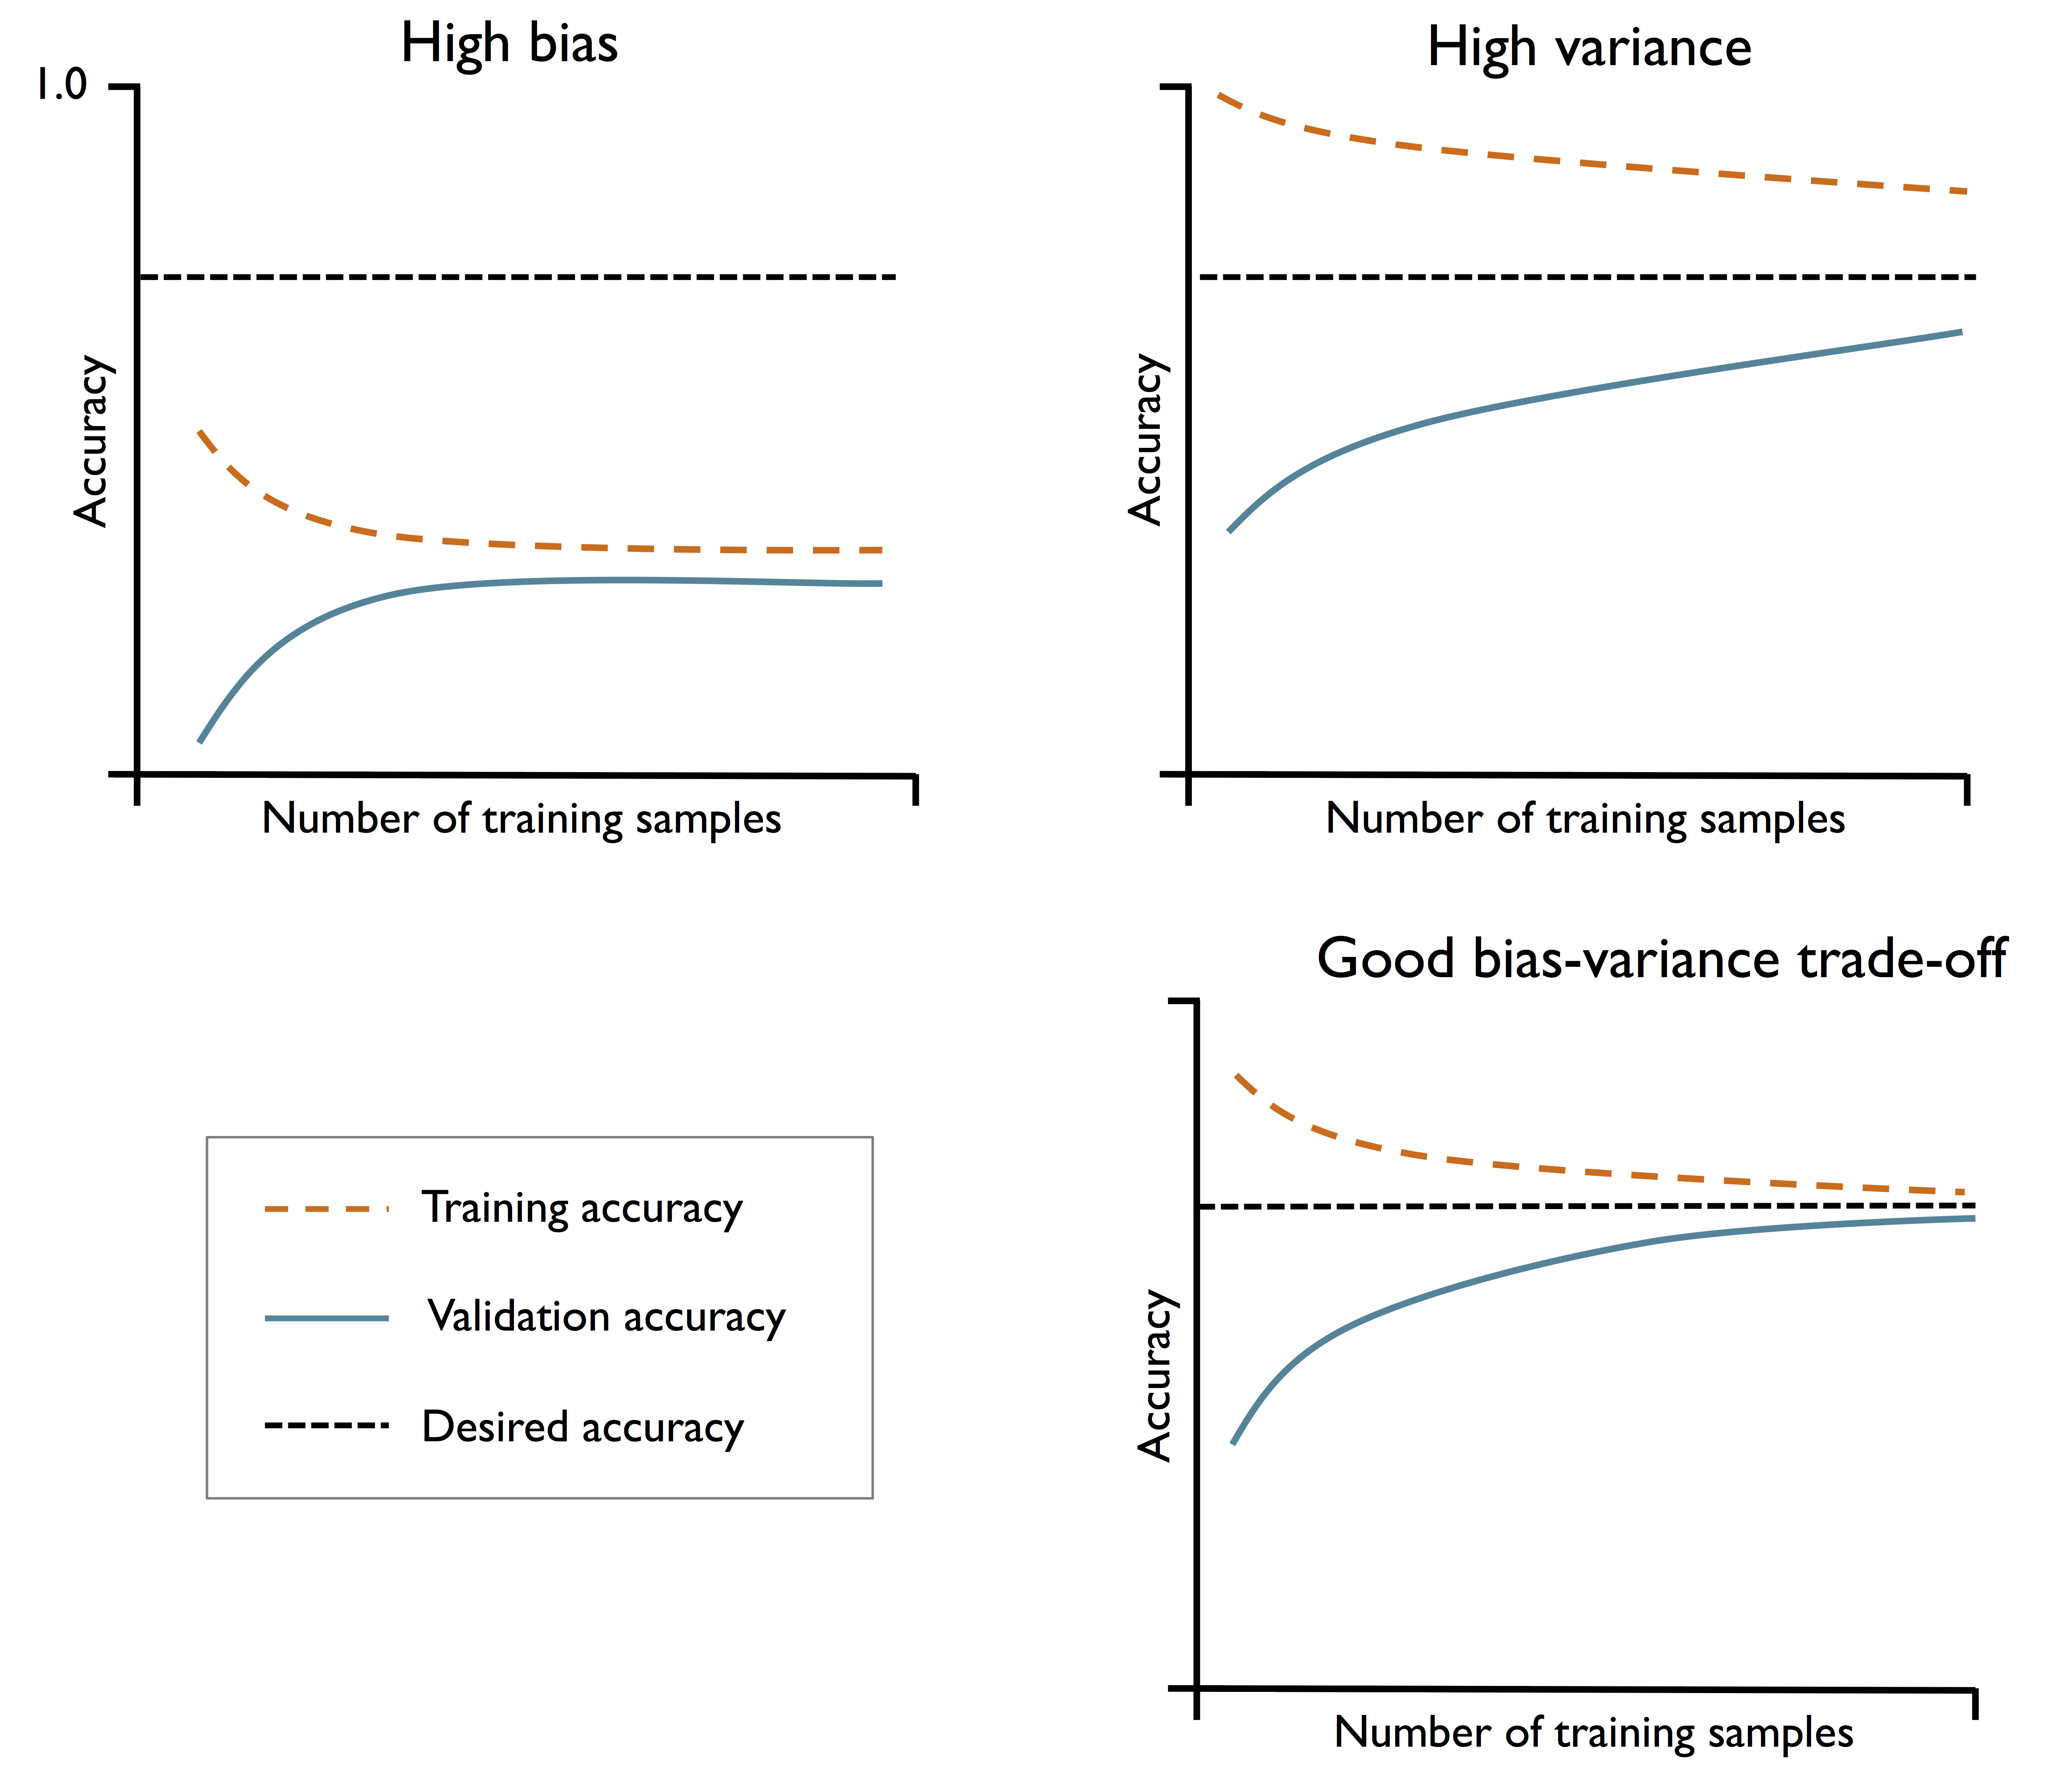

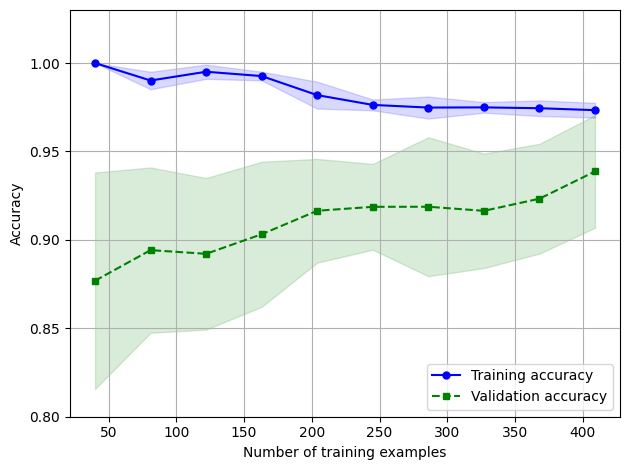

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=tree,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

# fill_between is used to fill the area between two values
# alpha is the transparency of the fill
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## Addressing over- and underfitting with validation curves

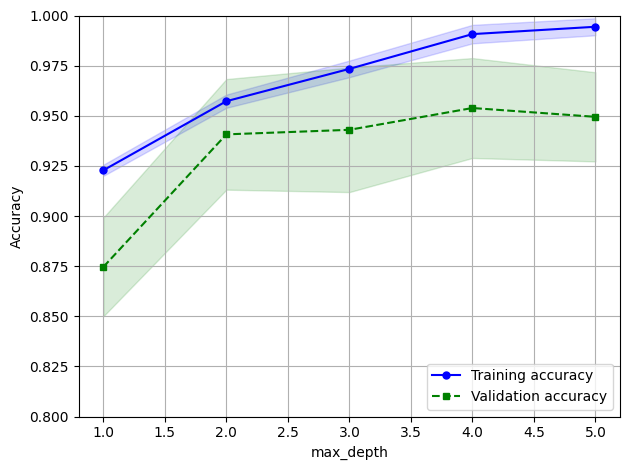

In [14]:
from sklearn.model_selection import validation_curve

# param_range will vary the max_depth parameter of the tree
param_range = [1,2,3,4,5]
train_scores, test_scores = validation_curve(
                estimator=tree,
                X=X_train,
                y=y_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

<br>
<br>

# Fine-tuning machine learning models via grid search

## Tuning hyperparameters via grid search

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' :['entropy','gini'],
    'max_depth':[1,2,3,4,5,6,7]
}

# scoring is the metric that will be used to evaluate the model
# refit=True means that the model will be refitted with the best parameters
# cv is the number of folds
gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9604830917874396
{'criterion': 'gini', 'max_depth': 6}


In [16]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train)
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 0.921


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'criterion' :['entropy','gini'],
    'max_depth': randint(1, 20)

}

# n_iter is the number of iterations
# n_jobs is the number of cores that will be used: -1 means all cores
rs = RandomizedSearchCV(estimator=tree,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=10,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)

In [18]:
rs = rs.fit(X_train, y_train)
print(rs.best_score_)

0.9604830917874396


In [19]:
rs.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [20]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

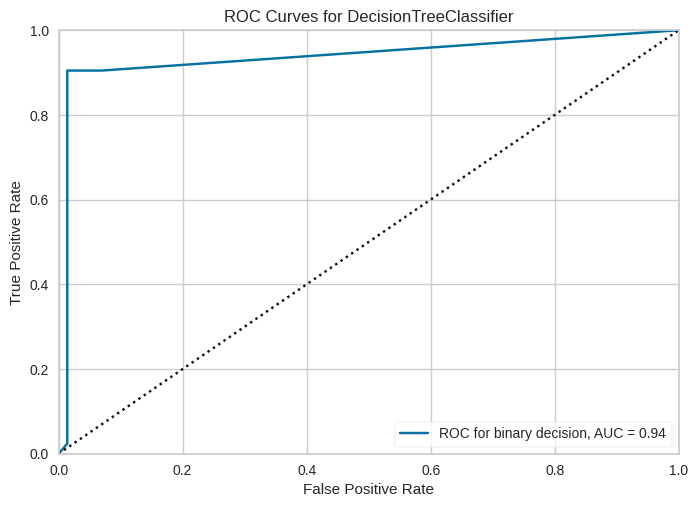

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [21]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(tree, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()